In [1]:
# source : https://otexts.org/fpp2/counts.html
    

In [2]:
import pandas as pd

%matplotlib inline

In [3]:
lCounts = "0 2 0 1 0 11 0 0 0 0 2 0 6 3 0 0 0 0 0 7 0 0 0 0 0 0 0 3 1 0 0 1 0 1 0 0".split()
lCounts = [float(c) for c in lCounts]
N = len(lCounts)
lDates = pd.date_range(start="2000-01-01", periods=N, freq='m')

df = pd.DataFrame({"Date" : lDates, "Count" : lCounts})

In [4]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
Date,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,2000-08-31 00:00:00,2000-09-30 00:00:00,2000-10-31 00:00:00,...,2002-03-31 00:00:00,2002-04-30 00:00:00,2002-05-31 00:00:00,2002-06-30 00:00:00,2002-07-31 00:00:00,2002-08-31 00:00:00,2002-09-30 00:00:00,2002-10-31 00:00:00,2002-11-30 00:00:00,2002-12-31 00:00:00
Count,0,2,0,1,0,11,0,0,0,0,...,0,3,1,0,0,1,0,1,0,0


In [5]:
#  q is often called the “demand” and a the “inter-arrival time”.
q = df[abs(df['Count']) > 0.0]['Count']
demand_times = pd.Series(list(q.index)) + 1
a = demand_times - demand_times.shift(1).fillna(0.0)
df2 = pd.DataFrame({'demand_time' : list(demand_times), 'q' : list(q) , 'a' : list(a) })
df2

,demand_time,q,a
0,2,2.0,2.0
1,4,1.0,2.0
2,6,11.0,2.0
3,11,2.0,5.0
4,13,6.0,2.0
5,14,3.0,1.0
6,20,7.0,6.0
7,28,3.0,8.0
8,29,1.0,1.0
9,32,1.0,3.0


In [6]:
def get_coeff(alpha , croston_type):
    if(croston_type == "sba"):
        return 1.0-(alpha/2.0)
    elif(croston_type == "sbj"):
        return (1.0 - alpha/(2.0-alpha))
    # default 
    return 1.0

In [7]:
# q  and a forecast
alpha = 0.1

df2['q_est'] = None
df2['a_est'] = None

df2.loc[0 , 'q_est'] = df2['q'][0]
df2.loc[0,  'a_est'] = df2['a'][0]
for i in range(df2.shape[0] - 1):
    q1 = (1.0 - alpha) * df2['q_est'][ i ] + alpha * df2['q'][ i ]
    a1 = (1.0 - alpha) * df2['a_est'][ i ] + alpha * df2['a'][ i ]
    df2.loc[i + 1, 'q_est'] = q1
    df2.loc[i + 1, 'a_est'] = a1


In [16]:
coeff = get_coeff(alpha , "default")
df2['forecast'] = coeff * df2['q_est'] / df2['a_est']
df2

,demand_time,q,a,q_est,a_est,forecast,index
0,2,2.0,2.0,2,2,1,1
1,4,1.0,2.0,2,2,1,3
2,6,11.0,2.0,1.9,2,0.95,5
3,11,2.0,5.0,2.81,2,1.405,10
4,13,6.0,2.0,2.729,2.3,1.18652,12
5,14,3.0,1.0,3.0561,2.27,1.3463,13
6,20,7.0,6.0,3.05049,2.143,1.42347,19
7,28,3.0,8.0,3.44544,2.5287,1.36253,27
8,29,1.0,1.0,3.4009,3.07583,1.10568,28
9,32,1.0,3.0,3.16081,2.86825,1.102,31


In [9]:
forecast_11 = df2['q_est'][10] / df2['a_est'][10]
forecast_11

1.0219697713174498

In [10]:
df2['index'] = df2['demand_time'] - 1

In [11]:
df1 = df.reset_index()
df3 = df1.merge(df2 , how='left', on=('index' , 'index'))


In [12]:
df3

,index,Date,Count,demand_time,q,a,q_est,a_est,forecast
0,0,2000-01-31,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2000-02-29,2.0,2.0,2.0,2.0,2,2,1
2,2,2000-03-31,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2000-04-30,1.0,4.0,1.0,2.0,2,2,1
4,4,2000-05-31,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2000-06-30,11.0,6.0,11.0,2.0,1.9,2,0.95
6,6,2000-07-31,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,7,2000-08-31,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,8,2000-09-30,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,9,2000-10-31,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df4 = df3.fillna(method='ffill')

In [14]:
df4

,index,Date,Count,demand_time,q,a,q_est,a_est,forecast
0,0,2000-01-31,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2000-02-29,2.0,2.0,2.0,2.0,2.000000,2.000000,1.000000
2,2,2000-03-31,0.0,2.0,2.0,2.0,2.000000,2.000000,1.000000
3,3,2000-04-30,1.0,4.0,1.0,2.0,2.000000,2.000000,1.000000
4,4,2000-05-31,0.0,4.0,1.0,2.0,2.000000,2.000000,1.000000
5,5,2000-06-30,11.0,6.0,11.0,2.0,1.900000,2.000000,0.950000
6,6,2000-07-31,0.0,6.0,11.0,2.0,1.900000,2.000000,0.950000
7,7,2000-08-31,0.0,6.0,11.0,2.0,1.900000,2.000000,0.950000
8,8,2000-09-30,0.0,6.0,11.0,2.0,1.900000,2.000000,0.950000
9,9,2000-10-31,0.0,6.0,11.0,2.0,1.900000,2.000000,0.950000


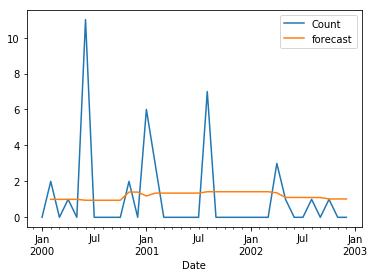

In [15]:
df4.plot('Date', ['Count' , 'forecast'])